In [19]:
import keras

In [2]:
import numpy as np

In [3]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [9]:
from keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


In [10]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5255 - accuracy: 0.7862 - val_loss: 0.4032 - val_accuracy: 0.8627
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3165 - accuracy: 0.8999 - val_loss: 0.3132 - val_accuracy: 0.8838
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2286 - accuracy: 0.9260 - val_loss: 0.2777 - val_accuracy: 0.8908
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1791 - accuracy: 0.9410 - val_loss: 0.2966 - val_accuracy: 0.8803
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1465 - accuracy: 0.9523 - val_loss: 0.2835 - val_accuracy: 0.8855
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1208 - accuracy: 0.9623 - val_loss: 0.2892 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1016 - accuracy: 0.9684 - val_loss: 0.3039 - val_accuracy: 0.8850
Epoch 8/20
30/3

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

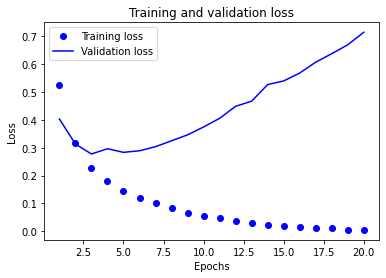

In [14]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

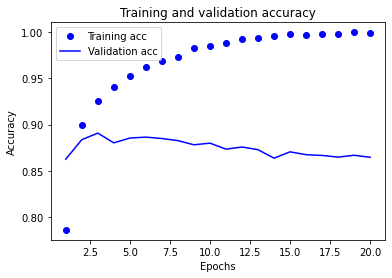

In [15]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.4556 - accuracy: 0.8187
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2574 - accuracy: 0.9084
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2011 - accuracy: 0.9276
Epoch 4/4
782/782 [==============================] - 1s 996us/step - loss: 0.2954 - accuracy: 0.8827


In [17]:
results

[0.29535746574401855, 0.8826799988746643]

In [18]:
model.predict(x_test)

782/782 [==============================] - 1s 866us/step


array([[0.23353581],
       [0.9995197 ],
       [0.9228385 ],
       ...,
       [0.1119376 ],
       [0.07463099],
       [0.7223697 ]], dtype=float32)